# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

Which applicants are more likely to get a loan

1. Applicants with less or no dependents
2. Loans with longer term
3. Applicants with coapplicants
4. Loans with smaller amount

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [212]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('../data/data.csv') 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [214]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Look at some basic statistics for numerical variables.

In [215]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)

ANSWER: 475 applicants

In [217]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

2. Is the `ApplicantIncome` distribution in line with your expectation? YES

Similarly, what about `CoapplicantIncome`? NO

In [218]:
df['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [219]:
df['CoapplicantIncome'].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.

In [220]:
#Applicant
print ('Mean:', df['ApplicantIncome'].mean())
print('Median:', df['ApplicantIncome'].median())

Mean: 5403.459283387622
Median: 3812.5


ApplicantIncome distribution of data is skewed to the left

In [221]:
#CoApplicant
print ('Mean:', df['CoapplicantIncome'].mean())
print('Median:', df['CoapplicantIncome'].median())

Mean: 1621.245798027101
Median: 1188.5


CoapplicantIncome distribution of data is skewed to the left

Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [222]:
df.describe(exclude='number')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [223]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [224]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [225]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [226]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [227]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [228]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [229]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



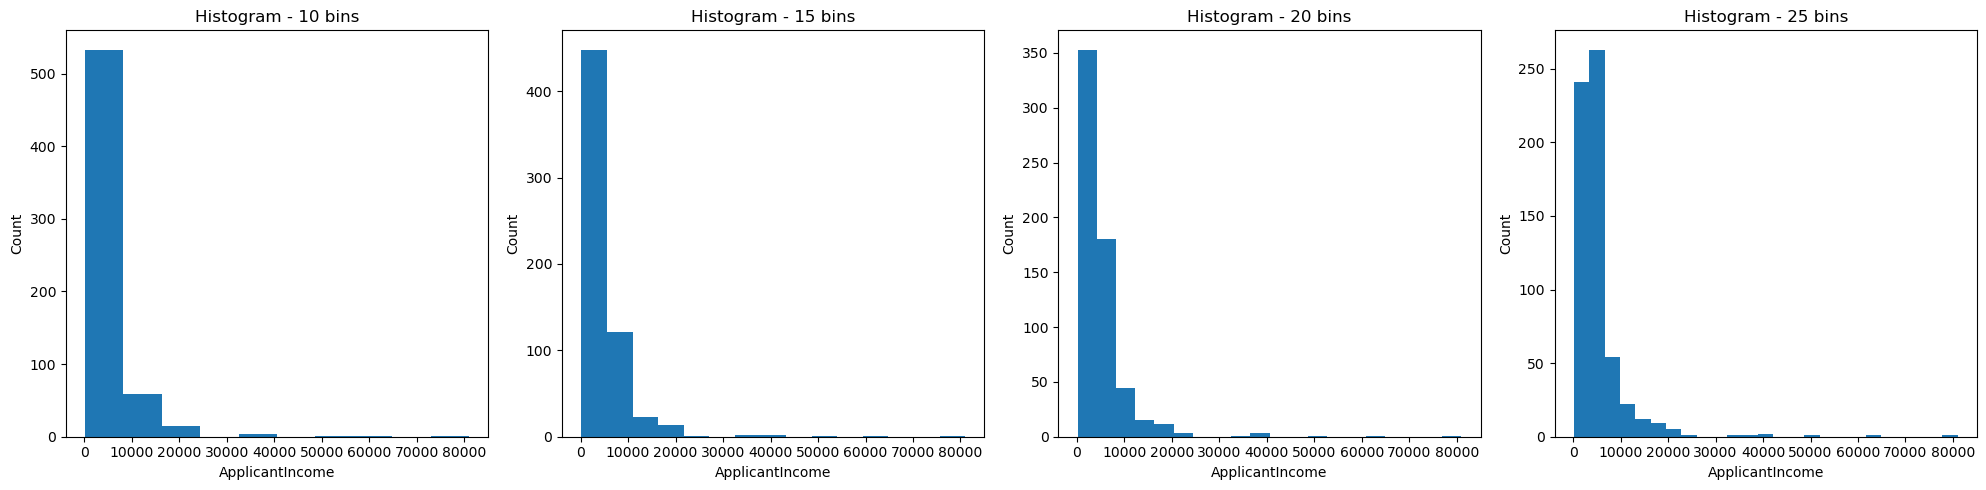

In [230]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

axs[0].hist(df['ApplicantIncome'], bins=10)
axs[0].set_title('Histogram - 10 bins')
axs[0].set_xlabel('ApplicantIncome')
axs[0].set_ylabel('Count')

axs[1].hist(df['ApplicantIncome'], bins=15)
axs[1].set_title('Histogram - 15 bins')
axs[1].set_xlabel('ApplicantIncome')
axs[1].set_ylabel('Count')

axs[2].hist(df['ApplicantIncome'], bins=20)
axs[2].set_title('Histogram - 20 bins')
axs[2].set_xlabel('ApplicantIncome')
axs[2].set_ylabel('Count')

axs[3].hist(df['ApplicantIncome'], bins=25)
axs[3].set_title('Histogram - 25 bins')
axs[3].set_xlabel('ApplicantIncome')
axs[3].set_ylabel('Count')

fig.tight_layout()
plt.show()


Look at box plots to understand the distributions. 

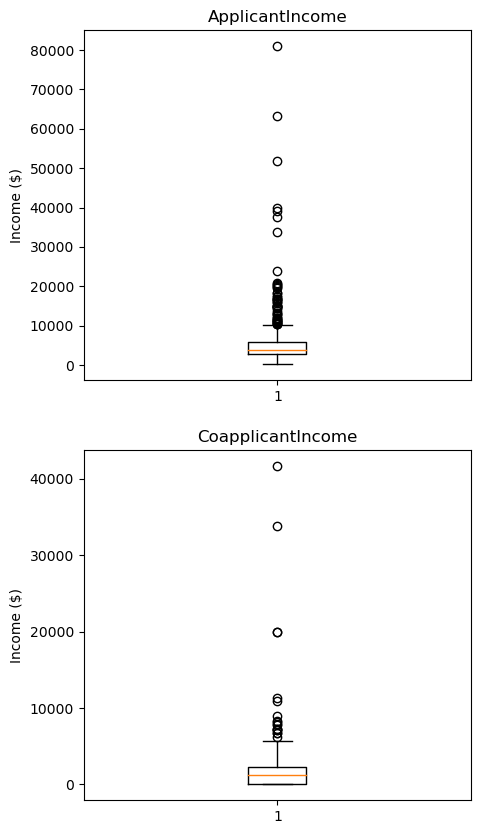

In [231]:
fig, axs = plt.subplots(2, 1, figsize=(5, 10))

axs[0].boxplot(df['ApplicantIncome'])
axs[0].set_title('ApplicantIncome')
axs[0].set_ylabel('Income ($)')

axs[1].boxplot(df['CoapplicantIncome'])
axs[1].set_title('CoapplicantIncome')
axs[1].set_ylabel('Income ($)')

plt.show()


Look at the distribution of income segregated  by `Education`

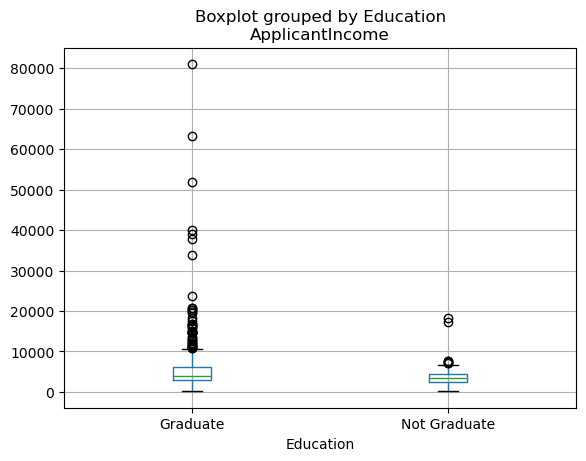

In [232]:
df.boxplot(column='ApplicantIncome', by='Education')
plt.show()

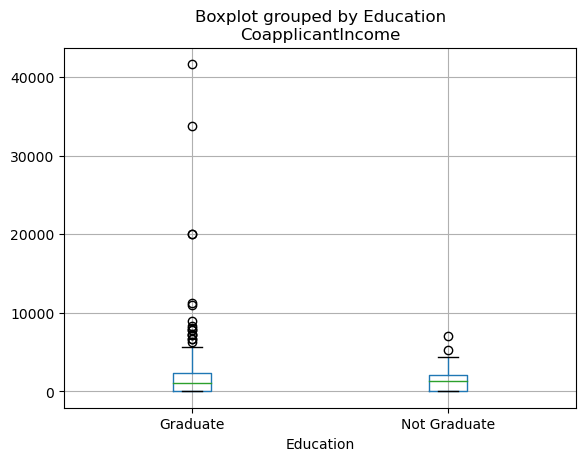

In [233]:
df.boxplot(column='CoapplicantIncome', by='Education')
plt.show()

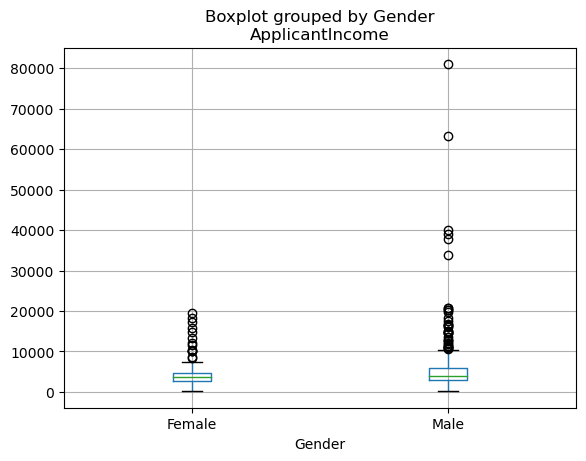

In [234]:
df.boxplot(column='ApplicantIncome', by='Gender')
plt.show()

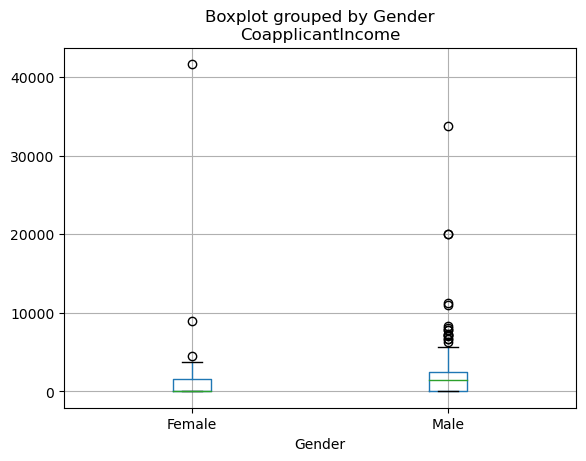

In [235]:
df.boxplot(column='CoapplicantIncome', by='Gender')
plt.show()

Look at the histogram and boxplot of LoanAmount

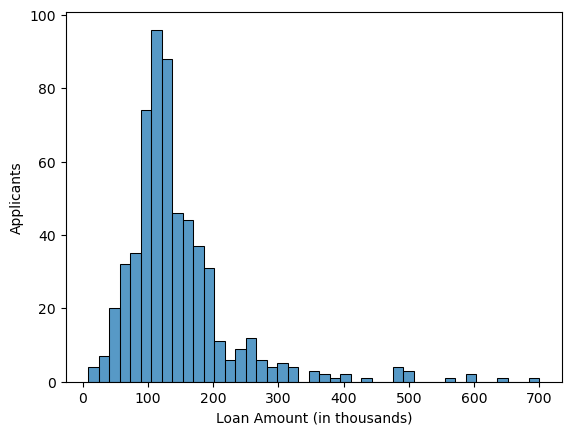

In [236]:
ax = sns.histplot(data=df, x='LoanAmount')
ax.set(xlabel="Loan Amount (in thousands)", ylabel="Applicants")
plt.show()

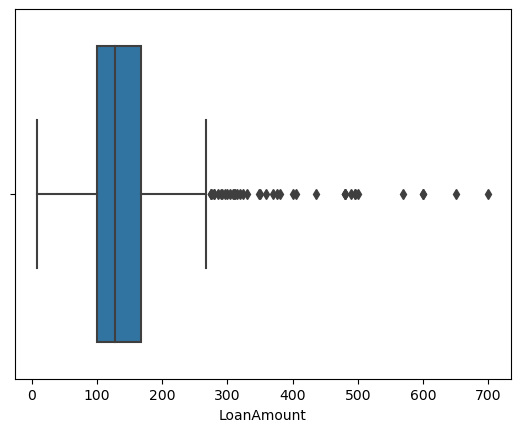

In [237]:
sns.boxplot(df['LoanAmount'])
plt.show()

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [238]:
#Amount of loans by gender
df_loan_gender = pd.pivot_table(df, values='LoanAmount', index=['Gender'], columns=['Loan_Status'], aggfunc=['count'], margins=True, margins_name='Total').rename(columns={"N": "Not_Approved", "Y": "Approved", 'count':'Quantity_of_Loans'})
#Amount of loans by marital status
df_loan_marital = pd.pivot_table(df, values='LoanAmount', index=['Married'], columns=['Loan_Status'], aggfunc=['count'], margins=True, margins_name='Total').rename(columns={"N": "Not_Approved", "Y": "Approved", 'count':'Quantity_of_Loans'})
#Amount of loans by education
df_loan_education = pd.pivot_table(df, values='LoanAmount', index=['Education'], columns=['Loan_Status'], aggfunc=['count'], margins=True, margins_name='Total').rename(columns={"N": "Not_Approved", "Y": "Approved", 'count':'Quantity_of_Loans'})
#Amount of loans by self employment
df_loan_semployed = pd.pivot_table(df, values='LoanAmount', index=['Self_Employed'], columns=['Loan_Status'], aggfunc=['count'], margins=True, margins_name='Total').rename(columns={"N": "Not_Approved", "Y": "Approved", 'count':'Quantity_of_Loans'})
#Amount of loans by porperty area
df_loan_prop = pd.pivot_table(df, values='LoanAmount', index=['Property_Area'], columns=['Loan_Status'], aggfunc=['count'], margins=True, margins_name='Total').rename(columns={"N": "Not_Approved", "Y": "Approved", 'count':'Quantity_of_Loans'})

In [239]:
df_loan_gender

Quantity_of_Loans               
Loan_Status      Not_Approved Approved Total
Gender                                      
Female                     36       73   109
Male                      140      330   470
Total                     176      403   579

In [240]:
df_loan_marital

Quantity_of_Loans               
Loan_Status      Not_Approved Approved Total
Married                                     
No                         75      131   206
Yes                       106      278   384
Total                     181      409   590

In [241]:
df_loan_education

Quantity_of_Loans               
Loan_Status       Not_Approved Approved Total
Education                                    
Graduate                   134      331   465
Not Graduate                47       80   127
Total                      181      411   592

In [242]:
df_loan_semployed

Quantity_of_Loans               
Loan_Status        Not_Approved Approved Total
Self_Employed                                 
No                          148      334   482
Yes                          25       54    79
Total                       173      388   561

In [243]:
df_loan_prop

Quantity_of_Loans               
Loan_Status        Not_Approved Approved Total
Property_Area                                 
Rural                        66      107   173
Semiurban                    53      175   228
Urban                        62      129   191
Total                       181      411   592

In [244]:
#Mean of loans by gender
df_mean_gender = pd.pivot_table(df, values='LoanAmount', index=['Gender'], columns=['Loan_Status'], aggfunc=['mean'], margins=True, margins_name='Total').rename(columns={"N": "Not_Approved", "Y": "Approved", 'mean':'Mean_of_Loans_(in_thousands)'}).round(2)
#Mean of loans by marital status
df_mean_marital = pd.pivot_table(df, values='LoanAmount', index=['Married'], columns=['Loan_Status'], aggfunc=['mean'], margins=True, margins_name='Total').rename(columns={"N": "Not_Approved", "Y": "Approved", 'mean':'Mean_of_Loans_(in_thousands)'}).round(2)
#Mean of loans by education
df_mean_education = pd.pivot_table(df, values='LoanAmount', index=['Education'], columns=['Loan_Status'], aggfunc=['mean'], margins=True, margins_name='Total').rename(columns={"N": "Not_Approved", "Y": "Approved", 'mean':'Mean_of_Loans_(in_thousands)'}).round(2)
#Mean of loans by self employment
df_mean_semployed = pd.pivot_table(df, values='LoanAmount', index=['Self_Employed'], columns=['Loan_Status'], aggfunc=['mean'], margins=True, margins_name='Total').rename(columns={"N": "Not_Approved", "Y": "Approved", 'mean':'Mean_of_Loans_(in_thousands)'}).round(2)
#Mean of loans by porperty area
df_mean_semployed = pd.pivot_table(df, values='LoanAmount', index=['Property_Area'], columns=['Loan_Status'], aggfunc=['mean'], margins=True, margins_name='Total').rename(columns={"N": "Not_Approved", "Y": "Approved", 'mean':'Mean_of_Loans_(in_thousands)'}).round(2)

In [245]:
df_mean_gender

Mean_of_Loans_(in_thousands)                 
Loan_Status                 Not_Approved Approved   Total
Gender                                                   
Female                            128.69   125.71  126.70
Male                              157.88   145.61  149.27
Total                             151.91   142.01  145.02

In [246]:
df_mean_marital

Mean_of_Loans_(in_thousands)                 
Loan_Status                 Not_Approved Approved   Total
Married                                                  
No                                134.91   125.44  128.88
Yes                               162.76   153.08  155.75
Total                             151.22   144.22  146.37

In [247]:
df_mean_education

Mean_of_Loans_(in_thousands)                 
Loan_Status                  Not_Approved Approved   Total
Education                                                 
Graduate                           161.39   151.09  154.06
Not Graduate                       122.23   116.16  118.41
Total                              151.22   144.29  146.41

In [248]:
df_mean_semployed

Mean_of_Loans_(in_thousands)                 
Loan_Status                   Not_Approved Approved   Total
Property_Area                                              
Rural                               158.74   148.26  152.26
Semiurban                           154.57   142.76  145.50
Urban                               140.35   143.09  142.20
Total                               151.22   144.29  146.41

In [249]:
df_mean_semployed

Mean_of_Loans_(in_thousands)                 
Loan_Status                   Not_Approved Approved   Total
Property_Area                                              
Rural                               158.74   148.26  152.26
Semiurban                           154.57   142.76  145.50
Urban                               140.35   143.09  142.20
Total                               151.22   144.29  146.41

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [251]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [252]:
#Columns to use mode to fill nulls
df['Gender'].mode()           #Mode:Male
#df['Married'].mode()         #Mode:Yes
#df['Self_Employed'].mode()   #Mode:No
#df['Dependents'].mode()   #Mode:No


0    Male
Name: Gender, dtype: object

In [253]:
df['Gender'] = df['Gender'].fillna('Male')
df['Married'] = df['Married'].fillna('Yes')
df['Self_Employed'] = df['Self_Employed'].fillna('No')
df['Dependents'] = df['Dependents'].fillna('0')

In [254]:
# Selected mean for Loan_Amount_Term and LoanAmount nulls
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [255]:
#Credit_History is a relevant input, therefore, decided to use 0 for nulls
df['Credit_History'] = df['Credit_History'].fillna(0)

In [256]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

In [257]:
df['Log_LoanAmount'] = np.log10(df['LoanAmount'])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Log_LoanAmount
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,2.165577
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,2.107210
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,1.819544
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,2.079181
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,2.149219


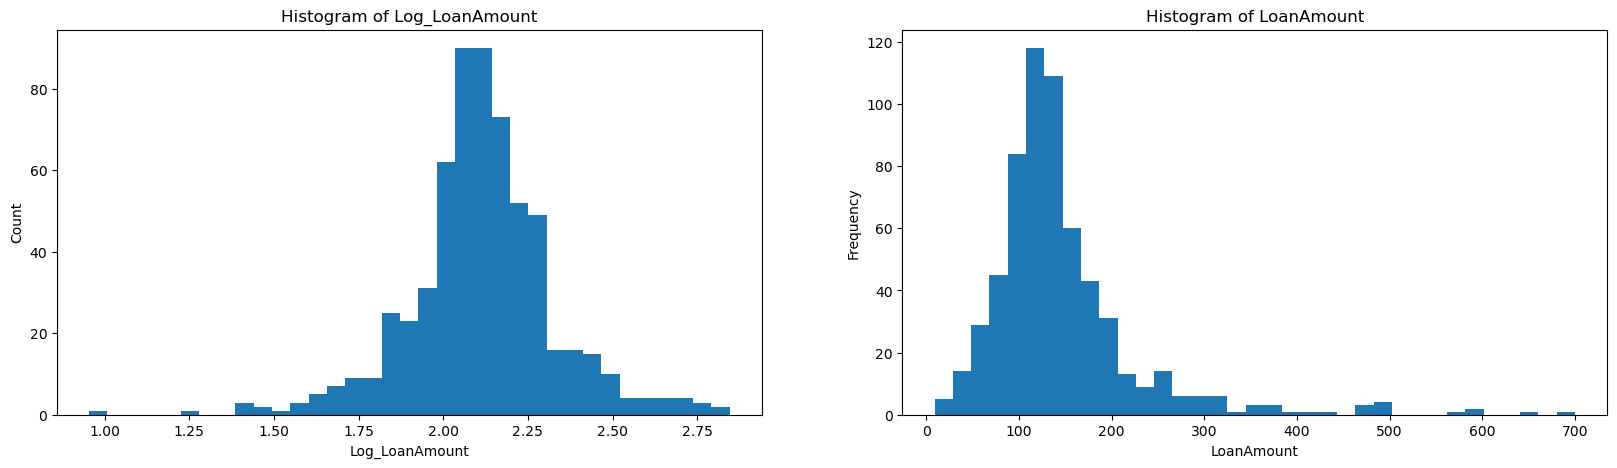

In [258]:
# Histogram comparison Log_LoanAmount Vs LoanAmount
fig, axs = plt.subplots(1, 2, figsize=(20,5))

axs[0].hist(df['Log_LoanAmount'], bins=35)
axs[0].set_xlabel('Log_LoanAmount')
axs[0].set_ylabel('Count')
axs[0].set_title('Histogram of Log_LoanAmount')

axs[1].hist(df['LoanAmount'], bins=35)
axs[1].set_xlabel('LoanAmount')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of LoanAmount')

plt.show()

Combine both incomes as total income and take a log transformation of the same.

In [259]:
df['total_income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['Log_total_income'] = np.log10(df['total_income'])

In [260]:
df_model = df

In [261]:
df_model

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Log_LoanAmount,total_income,Log_total_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,2.165577,5849.0,3.767082
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,2.107210,6091.0,3.784689
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,1.819544,3000.0,3.477121
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,2.079181,4941.0,3.693815
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,2.149219,6000.0,3.778151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,1.851258,2900.0,3.462398
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,1.602060,4106.0,3.613419
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,2.403121,8312.0,3.919706
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,2.271842,7583.0,3.879841


## 4. Building a Predictive Model

In [263]:
#Preparing variables
cat_features = ['Married', 'Dependents', 'Education', 'Credit_History', 'Property_Area']
df_model = pd.get_dummies(df_model, columns = cat_features)
df_model.head()

,Loan_ID,Gender,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Log_LoanAmount,total_income,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,Male,No,5849,0.0,146.412162,360.0,Y,2.165577,5849.0,...,0,0,0,1,0,0,1,0,0,1
1,LP001003,Male,No,4583,1508.0,128.000000,360.0,N,2.107210,6091.0,...,1,0,0,1,0,0,1,1,0,0
2,LP001005,Male,Yes,3000,0.0,66.000000,360.0,Y,1.819544,3000.0,...,0,0,0,1,0,0,1,0,0,1
3,LP001006,Male,No,2583,2358.0,120.000000,360.0,Y,2.079181,4941.0,...,0,0,0,0,1,0,1,0,0,1
4,LP001008,Male,No,6000,0.0,141.000000,360.0,Y,2.149219,6000.0,...,0,0,0,1,0,0,1,0,0,1


In [264]:
df_model.columns

Index(['Loan_ID', 'Gender', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Loan_Status',
       'Log_LoanAmount', 'total_income', 'Log_total_income', 'Married_No',
       'Married_Yes', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Education_Graduate', 'Education_Not Graduate',
       'Credit_History_0.0', 'Credit_History_1.0', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [265]:
df_pre_model = df_model.drop(columns=['Loan_ID','Gender','Self_Employed','ApplicantIncome','CoapplicantIncome'])
df_pre_model.head()

,LoanAmount,Loan_Amount_Term,Loan_Status,Log_LoanAmount,total_income,Log_total_income,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,146.412162,360.0,Y,2.165577,5849.0,3.767082,1,0,1,0,0,0,1,0,0,1,0,0,1
1,128.000000,360.0,N,2.107210,6091.0,3.784689,0,1,0,1,0,0,1,0,0,1,1,0,0
2,66.000000,360.0,Y,1.819544,3000.0,3.477121,0,1,1,0,0,0,1,0,0,1,0,0,1
3,120.000000,360.0,Y,2.079181,4941.0,3.693815,0,1,1,0,0,0,0,1,0,1,0,0,1
4,141.000000,360.0,Y,2.149219,6000.0,3.778151,1,0,1,0,0,0,1,0,0,1,0,0,1


In [266]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

In [267]:
#Prepare data for variables
X = df_pre_model.drop(['Loan_Status'], axis=1)
y = df_pre_model['Loan_Status']

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=25)

In [268]:
#Random Forest Classifier Model
model_clf = RandomForestClassifier()
model_clf.fit(X_train,y_train)
y_pred = model_clf.predict(X_test)

In [269]:
print('Accuracy =', accuracy_score(y_test, y_pred))
print('Precision =', precision_score(y_test, y_pred, average='macro'))
print('Recall =', recall_score(y_test, y_pred, average='macro'))
print('F1 score = ', f1_score(y_test, y_pred, average='macro'))

Accuracy = 0.7235772357723578
Precision = 0.6959595959595959
Recall = 0.6691860465116279
F1 score =  0.6763157894736842


Try paramater grid search to improve the results

In [ ]:
#Hyper parameters 
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [0, 5, 10],
    'min_samples_split': [2, 4, 7, 10],
    'min_samples_leaf': [1, 2, 3, 5]
}

# GridSearchCV config and training data fit
grid_search = GridSearchCV(model_clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

In [ ]:
# Best hyperparams and its score
print("Best hyperparams:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [270]:
from sklearn.pipeline import FeatureUnion
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler 

In [271]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [272]:

feature_union = FeatureUnion([('pca', PCA(n_components=3)), 
                              ('select_best', SelectKBest(k=6))])

pipeline = Pipeline(steps=[('scaling', StandardScaler()),
                           ('features', feature_union),
                           ('classifier',RandomForestClassifier())])
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Test set accuracy: {acc}')

Test set accuracy: 0.6910569105691057


## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [274]:
#Save picle
import pickle
with open('loan_pred.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

In [7]:
observation = {'LoanAmount': 141,
        'Loan_Amount_Term': 360,
        'Log_LoanAmount': 1.819544,
        'total_income': 4900,
        'Log_total_income': 3.784689,
        'Married_No': 1,
        'Married_Yes': 0,
        'Dependents_0': 1,
        'Dependents_1': 0,
        'Dependents_2': 0,
        'Dependents_3+': 0,
        'Education_Graduate': 1,
        'Education_Not Graduate': 0,
        'Credit_History_0.0': 0,
        'Credit_History_1.0': 1,
        'Property_Area_Rural': 0,
        'Property_Area_Semiurban': 0,
        'Property_Area_Urban': 1,
}

In [281]:
import requests
import json

url = 'http://localhost:5000/predict'

response=requests.get(url, json=observation)
print(response.text)

[
  "N"
]



In [8]:
import requests
import json

url = 'http://ec2-18-217-43-51.us-east-2.compute.amazonaws.com:5000/scoring'

response=requests.post(url, json=observation)
print(response.text)

[[0.62,0.38]]

